In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [2]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


We categorize output as binary. Those belong to class iris-virginica are labeled with True, those don't belong to class iris-virginica are labeled with False.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Predict probability of being True or False. Predict the test dataset.

In [19]:
y_test_proba = log_reg.predict_proba(X_test)
y_test_proba

array([[7.96014328e-01, 2.03985672e-01],
       [9.99991933e-01, 8.06676033e-06],
       [1.68962752e-03, 9.98310372e-01],
       [7.88230647e-01, 2.11769353e-01],
       [7.19220879e-01, 2.80779121e-01],
       [9.99992178e-01, 7.82176002e-06],
       [9.82501228e-01, 1.74987722e-02],
       [1.80900927e-01, 8.19099073e-01],
       [7.37507916e-01, 2.62492084e-01],
       [9.67192891e-01, 3.28071088e-02],
       [2.69093660e-01, 7.30906340e-01],
       [9.99995049e-01, 4.95087673e-06],
       [9.99997229e-01, 2.77120685e-06],
       [9.99994040e-01, 5.96027498e-06],
       [9.99994176e-01, 5.82372170e-06],
       [7.06574537e-01, 2.93425463e-01],
       [3.18271628e-02, 9.68172837e-01],
       [9.68061654e-01, 3.19383458e-02],
       [8.26116771e-01, 1.73883229e-01],
       [4.70954543e-02, 9.52904546e-01],
       [9.99990195e-01, 9.80534366e-06],
       [4.26347933e-01, 5.73652067e-01],
       [9.99988102e-01, 1.18976087e-05],
       [5.70537449e-02, 9.42946255e-01],
       [2.344674

In [20]:
print(f'Actual outcome {y_test[0]}')
print(f'Predicted outcome probabilities {y_test_proba[0]}')

Actual outcome False
Predicted outcome probabilities [0.79601433 0.20398567]


which means probability of getting false (not iris-virginica) is ~0.79

In [22]:
y_predict_test = log_reg.predict(X_test)

Predicted outcomes of test class:

In [29]:
y_predict_test

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False])

In order to evaluate performance the logistic regression, we can use confusion matrix of actual and predicted outcomes. The confusion matrix shows us 4 different rates.
1. True Positives: Number of outcomes predicted as True are actually True
2. False Positives: Number of outcomes predicted as True are actually False
3. True Negavites: Number of outcomes predicted as False that are acually False
4. False Negatives: Number of outcomes predicted as False that are acually True

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
print(cm)

[[26  0]
 [ 0 12]]


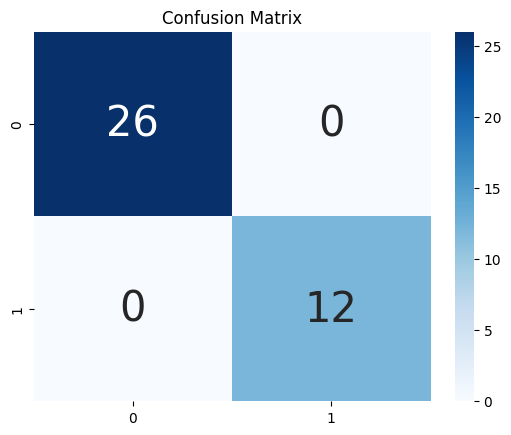

In [13]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

Here in confusion matrix <br>
TP = 26, FN =  0, <br> 
FP =  0, TN = 12

In [14]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y_test, y_predict_test)
print(f'accuracy score is {score}')

accuracy score is 1.0


Accuracy shows the ratio of correctly predicted outcomes to the all predicted outcomes.Accuracy is 1, which shows this model produces no false positives and has a precision of 1.0. 

Accuary score itself may be misleading because the distribution and balance of false negatives and false poisitves are also important to evaluate an ML model.

In classification, precision and recall are additional performance metrics ([Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)).

* Precision is the fraction of relevant instances among the retrieved instances. This is equal to: $Precision = \frac{True \ Positives}{True \ Positives + False \ Positives}$
* Recall is (also known as sensitivity) is the fraction of relevant instances that were retrieved. $Recall = \frac{True \ Positives}{True \ Positives + False \ Negatives}$

So, let's calculate precision and recall values. They measure the relevance of of the model predictions. Precision gives an idea about the quality of classification, while recall gives an idea about the coverage of the classification.

In [15]:
precision = 26/(26 + 0)
print(f'Precision is {precision}')

Precision is 1.0


In [ ]:
recall = 26/(26 + 0)
print(f'Recall is {recall}')

Recall is 1.0


As we see, both precision and recall are 1. This means the model 100% precise in detecting iris-virginica flowers and it doesn't miss any of it.

### ROC Curve
The receiving operating characteristic (ROC) is a metric that evaluates how well a classifier performs. It quantifies the accuracy of identifying positive data points correctly and the tendency to misclassify negative data points as positive. By plotting these proportions, we create a visual representation that illustrates the balance between accurately predicting something and the likelihood of making incorrect predictions.

In [ ]:
# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

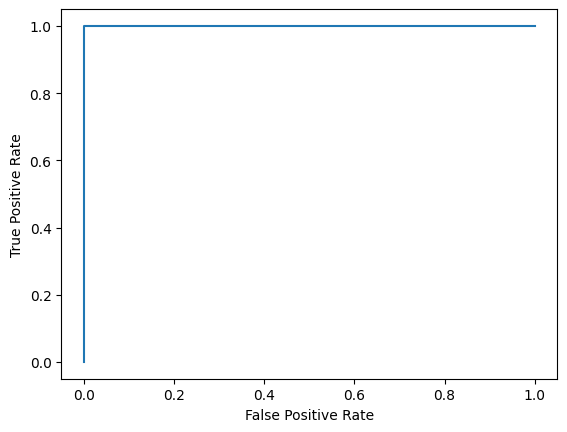

In [16]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_test_proba[:,1])

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It is rectangular because model perfectly fits the test data.

### Measuring the model performance on training data

We can also check the train dataset with cross validation.

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)


In [ ]:
score =accuracy_score(y_train, y_train_pred)
print(f'accuracy score is {score}')

accuracy score is 0.9464285714285714


In [25]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[70,  4],
       [ 2, 36]], dtype=int64)

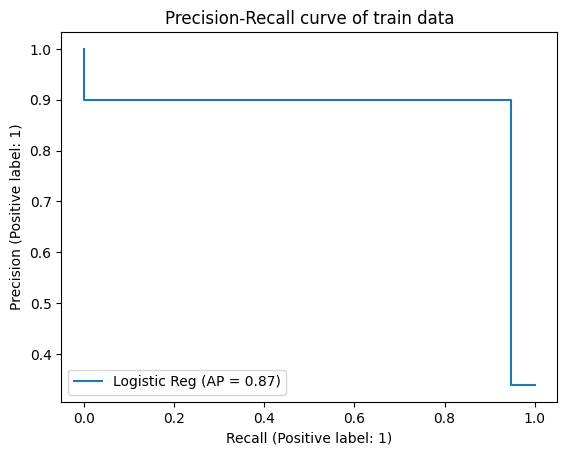

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_train, y_train_pred, name="Logistic Reg")
_ = display.ax_.set_title("Precision-Recall curve of train data")

AP means average precision score. It summarizes a precision-recall curve as the weighted mean of precision achieved at each threshold, with the increase in recall from the previous threshold used as the weight.” So, we can think of AP as a kind of weighted-average precision across all thresholds ([Precision-Recall Curves](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248)).